In [42]:
#Siphon Imports
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units

#MetPy Skew-T Imports
import matplotlib.pyplot as plt
import metpy.plots as plot
import numpy as np
import metpy.calc as mpcalc

%matplotlib inline

In [43]:
date = datetime(2013, 6, 1, 0)
station = "OUN"

In [44]:
df = WyomingUpperAir.request_data(date, station)

df

pressure = df['pressure'].values * units(df.units['pressure'])
temperature = df['temperature'].values * units(df.units['temperature'])
dewpoint = df['dewpoint'].values * units(df.units['temperature'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
v_wind = df['v_wind'].values * units(df.units['v_wind'])

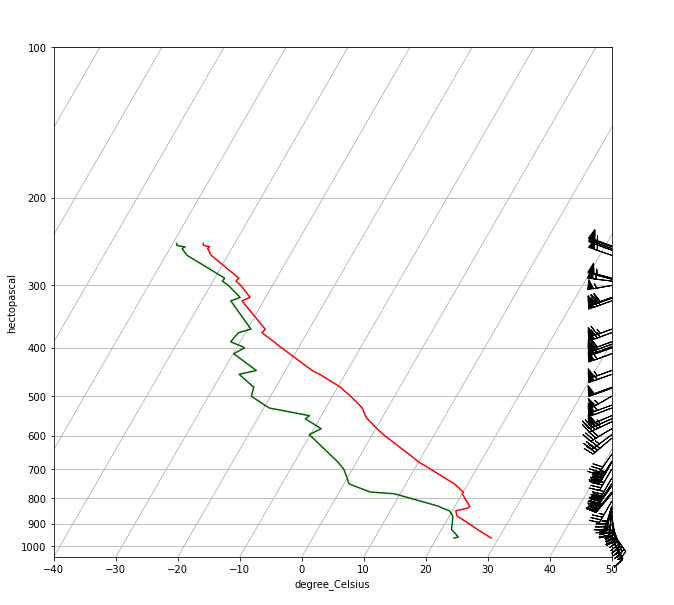

In [45]:
fig = plt.figure(figsize=(10,10))

skew = plot.SkewT(fig)

skew.plot(pressure, temperature, 'red')
skew.plot(pressure, dewpoint, 'darkgreen')
skew.plot_barbs(pressure, u_wind, v_wind)

In [46]:
#Use boolean masking to reduce the number of wind barbs

mask = pressure >= 400 * units.hPa

mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

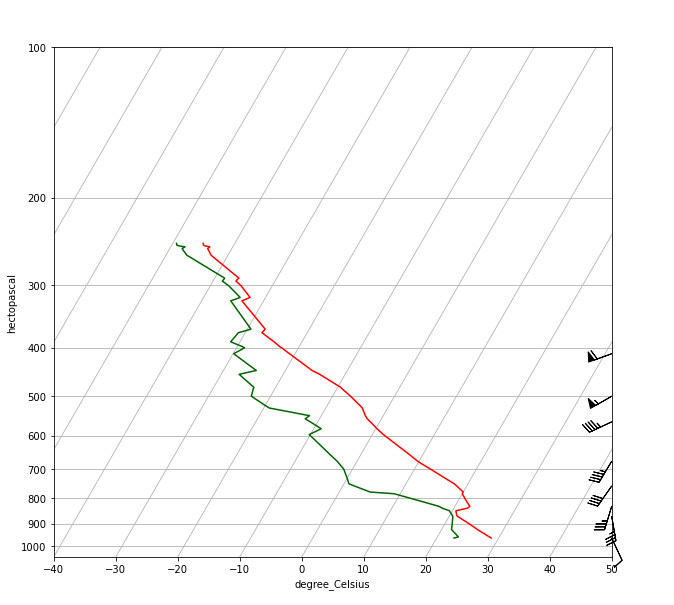

In [59]:
fig2 = plt.figure(figsize=(10,10))
skew2 = plot.SkewT(fig2)
skew2.plot(pressure, temperature, 'red')
skew2.plot(pressure, dewpoint, 'darkgreen')

#In the call below [::5] will blot every fifth value to thin out the wind barbs

skew2.plot_barbs(pressure[mask][::5], u_wind[mask][::5], v_wind[mask][::5]) 

In [60]:
#Getting a bit more specific with which levels barbs should plot at in the sounding

interval = np.arange(100, 1001, 50) * units.hPa #generates a range

idx = mpcalc.resample_nn_1d(pressure, interval) #nearest-neighbor search

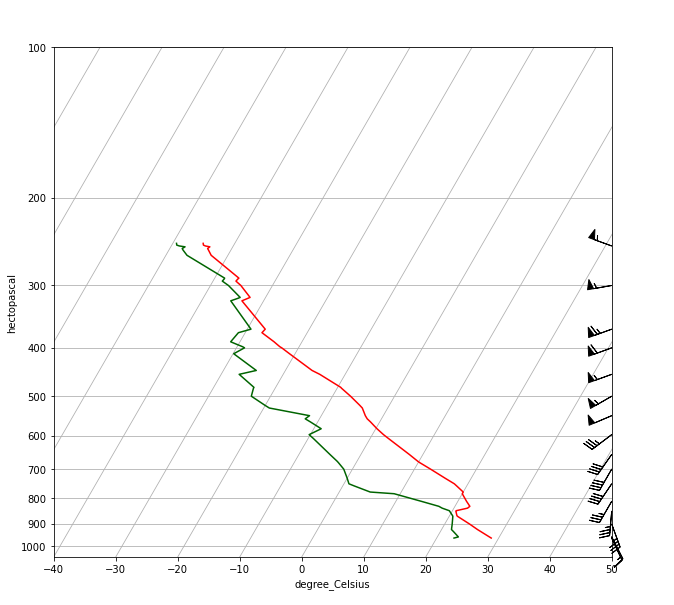

In [66]:
fig3 = plt.figure(figsize=(10,10))
skew3 = plot.SkewT(fig3)

skew3.plot(pressure, temperature, 'red')
skew3.plot(pressure, dewpoint, 'darkgreen')

skew3.plot_barbs(pressure[idx], u_wind[idx], v_wind[idx])

In [68]:
np.logspace(2 ,3) #These are log-base-10 values, corresponding to 100 and 1000

array([ 100.        ,  104.81131342,  109.8541142 ,  115.13953993,
        120.67926406,  126.48552169,  132.57113656,  138.94954944,
        145.63484775,  152.64179672,  159.98587196,  167.68329368,
        175.75106249,  184.20699693,  193.06977289,  202.35896477,
        212.09508879,  222.29964825,  232.99518105,  244.20530945,
        255.95479227,  268.26957953,  281.1768698 ,  294.70517026,
        308.88435965,  323.74575428,  339.32217719,  355.64803062,
        372.75937203,  390.69399371,  409.49150624,  429.19342601,
        449.8432669 ,  471.48663635,  494.17133613,  517.94746792,
        542.86754393,  568.9866029 ,  596.36233166,  625.05519253,
        655.12855686,  686.648845  ,  719.685673  ,  754.31200634,
        790.60432109,  828.64277285,  868.51137375,  910.29817799,
        954.09547635, 1000.        ])

In [76]:
interval2 = np.logspace(2, 3) * units.hectopascal

idx2 = mpcalc.resample_nn_1d(pressure, interval)

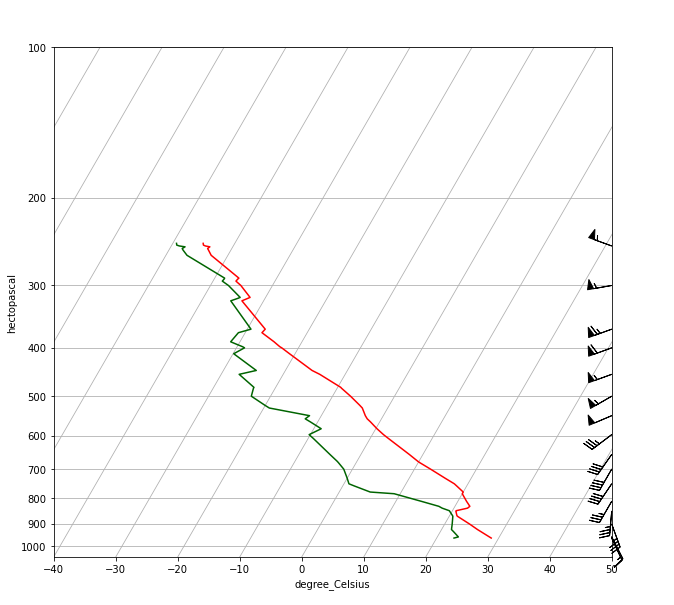

In [77]:
fig4 = plt.figure(figsize=(10,10))
skew4 = plot.SkewT(fig4)

skew4.plot(pressure, temperature, 'red')
skew4.plot(pressure, dewpoint, 'darkgreen')

skew4.plot_barbs(pressure[idx2], u_wind[idx2], v_wind[idx2])